# Time Series Analysis Part 2 - Visualization

## Imports

In [1]:
# Linear Algebra, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as statsmodels

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Setup the Data

In [2]:
df_1 = pd.read_csv("./datasets/AMZN.csv", index_col="Date", parse_dates=True)
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,3299.610107,3329.000000,3192.739990,3207.209961,3207.209961,5223600
2020-10-20,3222.280029,3266.000000,3192.010010,3217.010010,3217.010010,4509700
2020-10-21,3212.500000,3233.879883,3160.000000,3184.939941,3184.939941,4592700
2020-10-22,3189.870117,3198.750000,3121.939941,3176.399902,3176.399902,4212000
2020-10-23,3191.000000,3205.330078,3140.000000,3204.399902,3204.399902,3466700
...,...,...,...,...,...,...
2021-10-11,3275.000000,3292.590088,3238.100098,3246.300049,3246.300049,2034200
2021-10-12,3257.000000,3267.530029,3236.280029,3247.330078,3247.330078,1819600
2021-10-13,3269.709961,3288.379883,3261.090088,3284.280029,3284.280029,2420100


In [3]:
df_1.index

DatetimeIndex(['2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30',
               ...
               '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

## Visualizations

### Matplotlib Pyplot

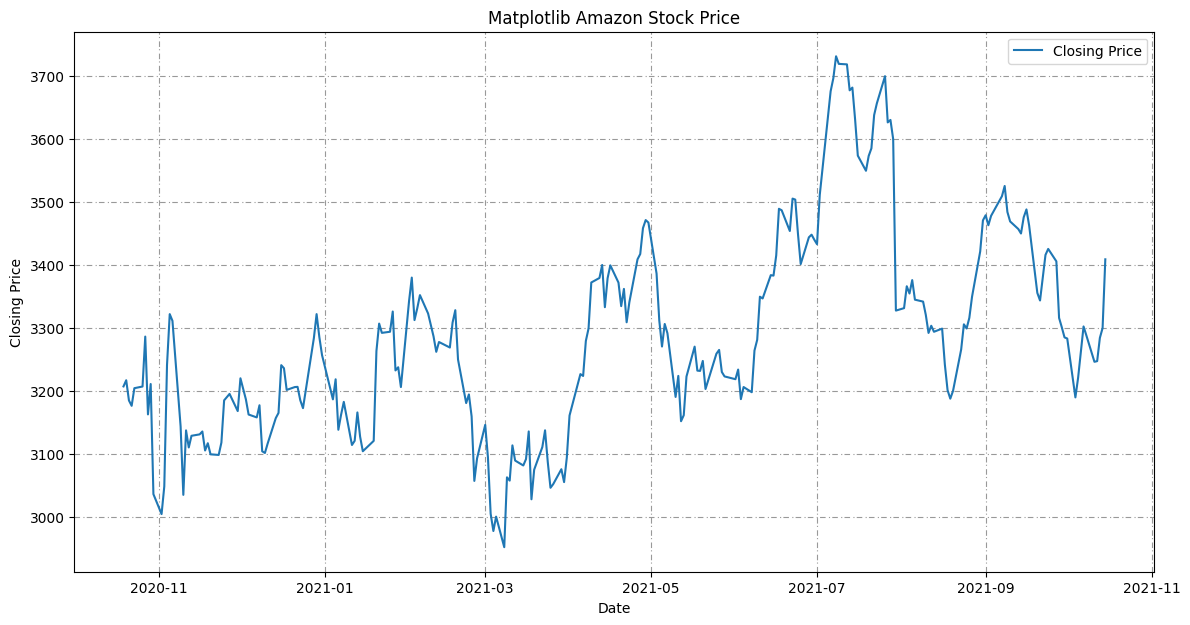

In [4]:
fig_1 = plt.figure(figsize=(12, 6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel("Date")
axes_1.set_ylabel("Closing Price")
axes_1.set_title("Matplotlib Amazon Stock Price")
axes_1.plot(df_1.index, df_1["Close"], label="Closing Price")
axes_1.legend(loc=0)
axes_1.grid(True, color="0.6", dashes=(5,3,1,2))

### Seaborn

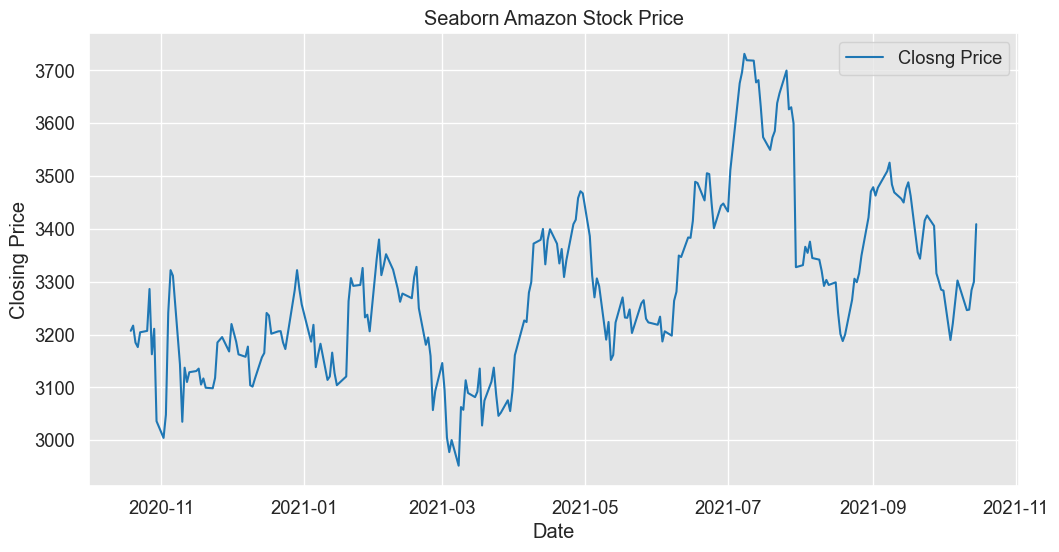

In [5]:
plt.figure(figsize=(12, 6), dpi=100)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidht": 2.5})
sns.lineplot(x="Date", y="Close", data=df_1, label="Closng Price")
plt.ylabel("Closing Price")
plt.title("Seaborn Amazon Stock Price")
plt.legend(loc=0)
plt.show()

## Plotly

In [6]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Amazon Stock Price and Moving Average", "Amazon Share Volume"))

fig.add_trace(go.Scatter(x=df_1.index, y=df_1["Close"], mode="lines", name="Closing Price"), row=1, col=1)
fig.add_trace(go.Scatter(   x=df_1.rolling(window=5).mean().index,
                            y=df_1.rolling(window=5).mean()["Close"],
                            mode='lines',
                            name="Moving Avg - 5"), row=1, col=1) # mean of values for 5 days 
fig.add_trace(go.Bar(x=df_1.index, y=df_1["Volume"], name="Volume"), row=2, col=1)

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)

fig.update_layout(
    showlegend=True,
    width=1150,
    height=800)

## Matplotlib Finance

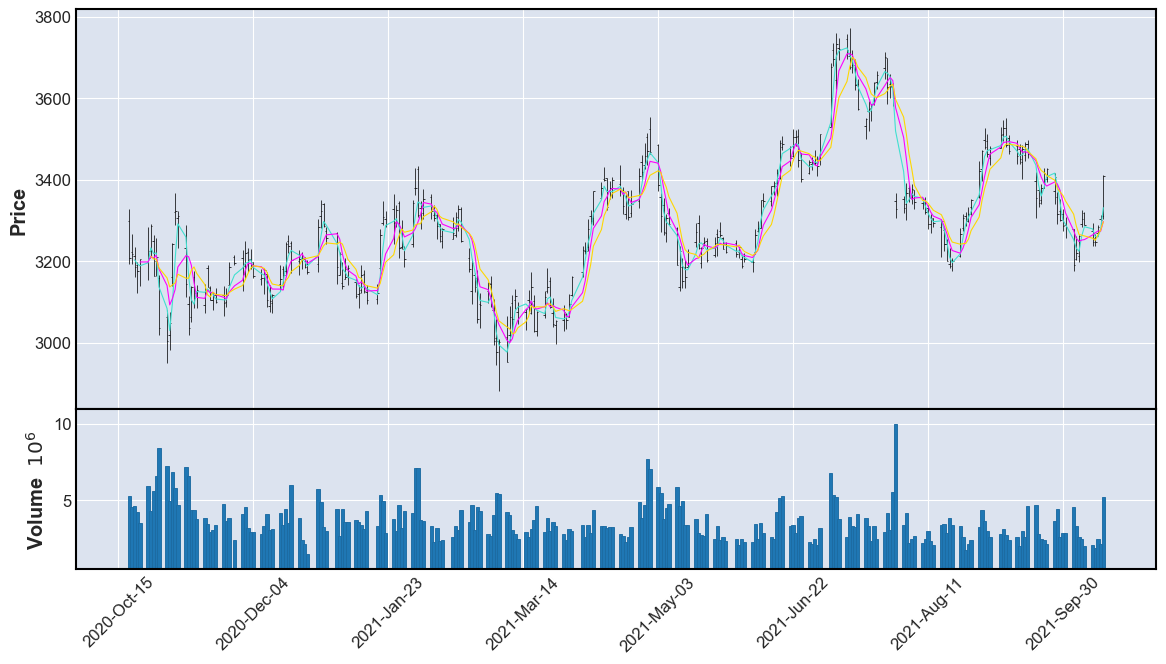

In [7]:
mpf.plot(df_1, type="ohlc", mav=(3, 5, 7), volume=True, show_nontrading=True, figsize=(15, 8))

## Plotting Time Periods and Styling

Text(0, 0.5, 'Closing Price')

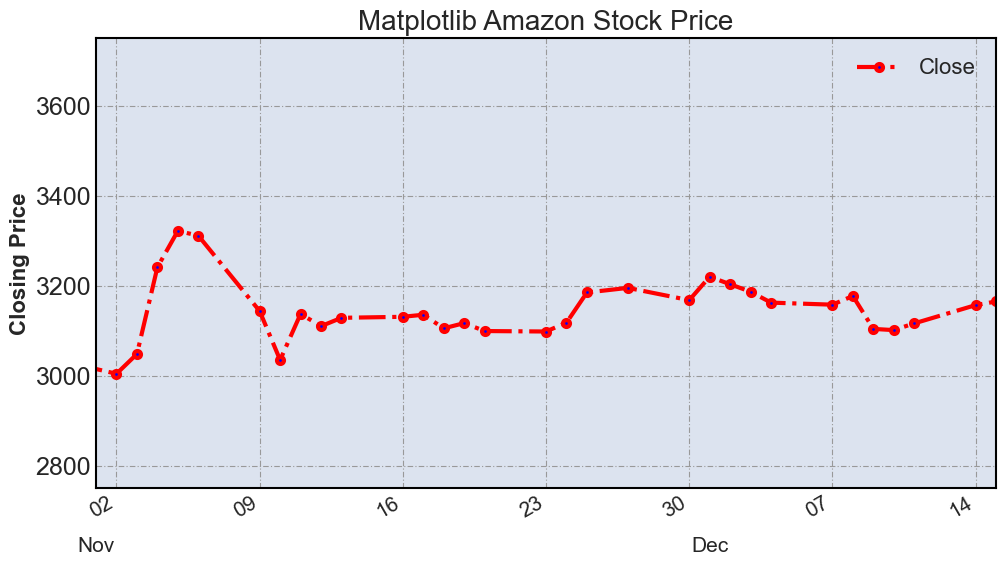

In [28]:
fig_1 = plt.figure(figsize=(10, 5), dpi=100)
ax_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel("Date")
ax_1.set_ylabel("Closing Price")
ax_1.set_title("Matplotlib Amazon Stock Price", fontsize=20)

df_1["Close"].plot(figsize=(10, 5), 
                   xlim=["2020-11-01", "2020-12-15"], 
                   ylim=[2750, 3750], 
                   color="red", 
                   lw=3,
                   ls="-.",
                   marker="o",
                   markersize=5,
                   markerfacecolor="blue",
                   markeredgecolor="red",
                   markeredgewidth=3)

ax_1.legend(loc=0, prop={"size": 16})
ax_1.grid(True, color="0.6", dashes=(5,2,1,2))
ax_1.tick_params(axis="x", labelsize=15)
ax_1.tick_params(axis="y", labelsize=18)

ax_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax_1.xaxis.set_major_formatter(dates.DateFormatter("%d"))
ax_1.xaxis.set_minor_locator(dates.MonthLocator())
ax_1.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

ax_1.tick_params(axis="both", which="minor", labelsize=15)

plt.xlabel("", fontsize=18)
plt.ylabel("Closing Price", fontsize=16)